# Fermi Surface Visualization   
**by <span style="color:darkgreen">Dmitrii Nabok</span> & <span style="color:darkgreen">Caterina Cocchi</span> for [<span style="color:darkgoldenrod">exciting *neon*</span>](https://www.exciting-code.org/neon)**

<font size="2">(Jupyter notebook by <span style="color:darkgreen">Mara Voiculescu</span> & <span style="color:darkgreen">Martin Kuban</span>)</font>
<hr style="border:2px solid #DDD"> </hr>

**<span style="color:firebrick">Purpose</span>**: In this tutorial, it will be shown how you can use **`exciting`** to calculate and visualize the Fermi surface of gold.
<hr style="border:2px solid #DDD"> </hr>

<div class="alert alert-block alert-warning">

**Table of Contents**
    
[0. Before Starting](#0)
    
[1. Fermi Surface 3D Plot](#1)  
      
   - [Exercise](#2)

</div>

<a id='0'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">0. Before Starting</span>

**<span style="color:firebrick">Read the following paragraphs before starting with the rest of this tutorial!</span>**

Before running any Jupyter tutorials, please refer to the **`00_before_starting.md`** document on how to correctly set up the environment. This only needs to be done once. After which, the **venv** can be (re)activated from **`exciting`**'s root directory:

<div style="background-color: rgb(224, 224, 224);">

```bash
source tools/excitingjupyter/venv/excitingvenv/bin/activate
```

</div>

As a first step, you may create a running directory for the notebook.

In [1]:
%%bash
mkdir -p run_tutorial_fermi_surface

<a id='1'></a>
<hr style="border:1px solid #DDD"> </hr>

### <span style="color:#15317E">1. Fermi Surface 3D Plot</span>

A general input file for generating the Fermi surface of gold should look like this:

<span class="FERMI_SURFACE"></span>
```xml
<input>
 
   <title>Gold</title>
 
   <structure speciespath="$EXCITINGROOT/species" autormt="true">
      <crystal scale="7.707">
         <basevect> 0.5  0.5  0.0 </basevect>
         <basevect> 0.5  0.0  0.5 </basevect>
         <basevect> 0.0  0.5  0.5 </basevect>
      </crystal>
      <species speciesfile="Au.xml">
         <atom coord="0.0 0.0 0.0"/>
      </species>
   </structure>
 
   <groundstate 
      do="fromscratch"
      xctype="GGA_PBE_SOL"
      rgkmax="8.0" 
      ngridk="8 8 8"
      nempty="10"
      stype="Methfessel-Paxton 1"
      swidth="0.01"
      >
   </groundstate>
 
   <properties>
      <fermisurfaceplot nstfsp="6">
         <plot3d>
            <box grid="40 40 40" >
               <origin coord="0 0 0"/>
               <point  coord="1 0 0"/>
               <point  coord="0 1 0"/>
               <point  coord="0 0 1"/>
            </box>
         </plot3d>
      </fermisurfaceplot>
   </properties>
 
</input>
```

In [2]:
from excitingjupyter.utilities import get_input_xml_from_notebook   

# Extract input file content from this notebook:
input_str = get_input_xml_from_notebook("02_tutorial_fermi_surface_visualization", "FERMI_SURFACE")

# Write out the input as an XML file:
with open('./run_tutorial_fermi_surface/input.xml', "w") as fid:
    fid.write(input_str)

To perform the actual calculation, make sure to set **$EXCITINGROOT** to the correct **`exciting`** root directory in the <code><span style="color:mediumblue">speciespath</span></code> attribute using the command

In [3]:
%%bash
cd run_tutorial_fermi_surface
python3 -m excitingscripts.setup.excitingroot
cd ..

Assuming that you are already familiar with the <code><span style="color:green">groundstate</span></code> block in the input file, we now focus on the <code><span style="color:green">properties</span></code> block:

```xml
...
   <properties>
      <fermisurfaceplot nstfsp="6">
         <plot3d>
            <box grid="40 40 40" >
               <origin coord="0 0 0"/>
               <point  coord="1 0 0"/>
               <point  coord="0 1 0"/>
               <point  coord="0 0 1"/>
            </box>
         </plot3d>
      </fermisurfaceplot>
   </properties>
...
```

The element <code><span style="color:green">fermisurfaceplot</span></code> triggers the calculation of the Fermi surface. The value of the attribute <code><span style="color:mediumblue">nstfsp</span></code> indicates the number of bands which are considered to compute the Fermi surface. In this case we choose **6**, which also corresponds to the default value for this attribute (see **[Input Reference](https://www.exciting-code.org/home/about/input-reference)**). By specifying the element <code><span style="color:green">plot3d</span></code> we are generating a 3D representation of the Fermi surface. For a complete description of the functionality of this element and of its sub-elements refer to the tutorial **How to visualize Kohn-Sham states**.

Now you can start the calculation by executing the following command.

In [4]:
%%bash
cd run_tutorial_fermi_surface
time $EXCITINGROOT/bin/exciting_smp input.xml
cd ..

 ### Using specified input file: input.xml
 ### Using specified input file: input.xml
 
Info(fermisurf):
 3D Fermi surface data written to FERMISURF.bxsf
 for plotting with XCrysDen (Fermi energy set to zero)
 
 Launch as: xcrysden --bxsf FERMISURF(_UP/_DN).bxsf


   Elapsed time = 1m58s


An output file **FERMISURF.bxsf** is generated. It is already suitable for visualization with **[XCrySDen](http://www.xcrysden.org/)**, by typing:

In [5]:
%%bash
cd run_tutorial_fermi_surface
xcrysden --bxsf FERMISURF.bxsf >/dev/null 2>&1 &
cd ..

<hr style="border:1px solid #DDD"> </hr>
<details>
    
<summary><strong><span style="color:firebrick">$\Rightarrow$ How to visualize bxsf files using XCrySDen</span></strong></summary>
    
The visualization of **bxsf** files with **XCrySDen** differs with respect to that of **xsf** files. In fact, the **bxsf** format is specifically designed to visualize Fermi surfaces as a **bandgrid** is printed in the file. Further details about this file format can be found **[here](http://www.xcrysden.org/doc/XSF.html#bxsf)**.

Typing the shell command
    
```bash
xcrysden --bxsf FERMISURF.bxsf >/dev/null 2>&1&
```

two small windows open on the screen. One contains the **XCrySDen** logo, while the other one is a small dialog window, where the Fermi energy should be specified. Please note, that for convenience, in the exciting output **FERMISURF.bxsf** all energies are already shifted by the Fermi energy so the required input at this step is **0.0**.

Then, press **<span style="color:mediumblue">OK</span>**. Three windows will appear:
    
- one named **<span style="color:green">Band width</span>** reports a number of text lines with the energy range of each band;
- another one called **<span style="color:green">BARGraph</span>** contains the width of each considered band and its position with respect to the Fermi energy. The information contained in this window is a guideline to select the bands in the next window;
- in the third window **<span style="color:green">Select Bands</span>**, one should select the bands to interpolate, among those which have been included. From the **<span style="color:green">BARGraph</span>** window it is evident that only **<span style="color:firebrick">band 4</span>** contributes to the Fermi surface.

After the selected bands have been ticked, press **<span style="color:mediumblue">Selected</span>**. At this point, a visualization window with the Brillouin zone (**BZ**) appears. For all the details about the surface rendering and interpolation, we refer to **[XCrySDen webpage about bxsf files](http://www.xcrysden.org/doc/fermi.html)**.

In the visualization window, there are a number of tabs, one for each band and a last one named **<span style="color:green">Merged Bands</span>**. Click on this tab and the plot appears. By clicking and moving the mouse on the visualization window, one can rotate the **BZ**.

</details>
<hr style="border:1px solid #DDD"> </hr>

As a result of the visualization, one should obtain something similar to the following figure:

<figure>
<img src=" 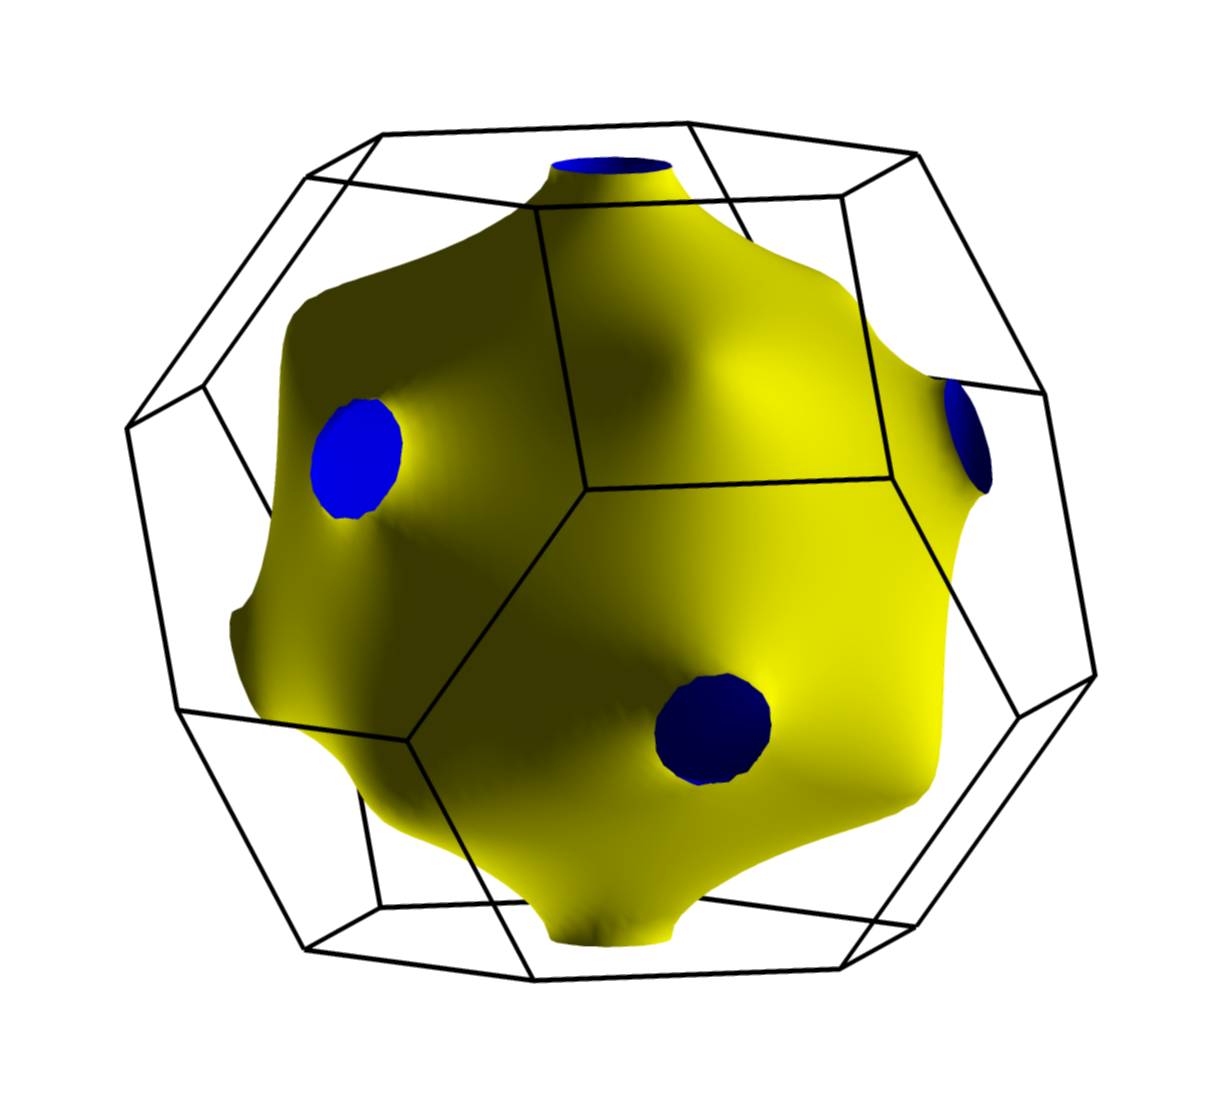" width="500" align="left"/>
</figure>

<a id='2'></a>
#### <span style="color:green">Exercise</span>

- Plot the Fermi surface for **<span style="color:green">silver</span>** and **<span style="color:green">aluminum</span>**. Analyze the band structure using the **<span style="color:green">BARGraph</span>** tool in **XCrySDen**. How many bands contribute to the Fermi surface for **<span style="color:green">Ag</span>**? How many for **<span style="color:green">Al</span>**?

<hr style="border:2px solid #DDD"> </hr>